# TEC series graphs

The purpose of this notebook is to make better versions of the figures 8 - 11 of the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Figure 8

Detrended sTEC time series for station KOUG for the event day and two previous days, to compare our time series with others when no meteor passed through the ionosphere. We will make a new change: instead of jumping the prior day, we will take it and the previous day of that. Being in the figure the days 2019-06-20, 2019-06-21 and 2019-06-22. For PRN 2 and 12 as planned initially.

__Step 1__. Load data from wherever they come.

In [2]:
dat1 = pd.read_csv("KOUG-2019-06-20.csv")
dat2 = pd.read_csv("./data/2019-06-22/set5/previous/previous2019-06-22_21.43_detrended-sTEC.csv")
dat3 = pd.read_csv("./data/2019-06-22/set5/2019-06-22_21.43_detrended-sTEC.csv")

__Step2__. Verify columns information.

In [3]:
dat1.head(5)

,Time,PRN,sTEC
0,18.933333,2,-0.106510
1,18.941667,2,-0.141038
2,18.950000,2,-0.122278
3,18.958333,2,-0.110266
4,18.966667,2,-0.175038


In [4]:
dat2.head(5)

,Station,Time,PRN,Latitude,Longitude,sTEC
0,boav,19.504167,2,5.602,-68.671,0.011590
1,boav,19.508333,2,5.617,-68.665,-0.071623
2,boav,19.512500,2,5.632,-68.658,-0.044879
3,boav,19.516667,2,5.648,-68.651,-0.078177
4,boav,19.520833,2,5.663,-68.644,-0.061519


In [5]:
dat3.head(5)

,Station,Time,PRN,Latitude,Longitude,sTEC
0,koug,18.933333,2,6.051,-65.633,0.280387
1,koug,18.941667,2,6.098,-65.609,0.251514
2,koug,18.950000,2,6.144,-65.584,0.216275
3,koug,18.958333,2,6.190,-65.559,0.214623
4,koug,18.966667,2,6.236,-65.534,0.176506


__Step 3__. Filter the relevant information.

In [6]:
time1 = dat1["Time"]
prn_mask1 = dat1["PRN"] == 2
prn_mask2 = dat1["PRN"] == 12
time1_p2 = np.array(time1[prn_mask1])
time1_p12 = np.array(time1[prn_mask2])
sTEC1 = dat1["sTEC"]
sTEC1_p2 = sTEC1[prn_mask1]
sTEC1_p12 = sTEC1[prn_mask2]

In [7]:
time2 = dat2["Time"]
prn_mask3 = dat2["PRN"] == 2
prn_mask4 = dat2["PRN"] == 12
station_mask = dat2["Station"] == "koug"
time2_p2 = np.array(time2[prn_mask3 & station_mask])
time2_p12 = np.array(time2[prn_mask4 & station_mask])
sTEC2 = dat2["sTEC"]
sTEC2_p2 = sTEC2[prn_mask3 & station_mask]
sTEC2_p12 = sTEC2[prn_mask4 & station_mask]

In [8]:
time3 = dat3["Time"]
prn_mask5 = dat3["PRN"] == 2
prn_mask6 = dat3["PRN"] == 12
station_mask = dat3["Station"] == "koug"
time3_p2 = np.array(time3[prn_mask5 & station_mask])
time3_p12 = np.array(time3[prn_mask6 & station_mask])
sTEC3 = dat3["sTEC"]
sTEC3_p2 = sTEC3[prn_mask5 & station_mask]
sTEC3_p12 = sTEC3[prn_mask6 & station_mask]

__Step 4__. Plot the graphs

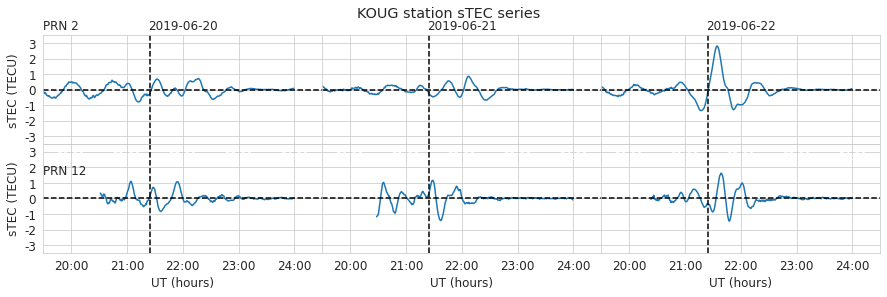

In [9]:
sns.set_style("whitegrid")
starttime = 21+25./60
f = plt.figure()
ax4 = f.add_subplot(2, 3, 4)
ax5 = f.add_subplot(2, 3, 5)
ax6 = f.add_subplot(2, 3, 6)
ax1 = f.add_subplot(2, 3, 1, sharex=ax4)
ax2 = f.add_subplot(2, 3, 2, sharex=ax5)
ax3 = f.add_subplot(2, 3, 3, sharex=ax6)
ax1.plot(time1_p2, sTEC1_p2)
ax2.plot(time2_p2, sTEC2_p2)
ax3.plot(time3_p2, sTEC3_p2)
ax4.plot(time1_p12, sTEC1_p12)
ax5.plot(time2_p12, sTEC2_p12)
ax6.plot(time3_p12, sTEC3_p12)
ax1.axhline(0.0, c="k", ls="--")
ax1.axvline(starttime, c="k", ls="--")
ax2.axhline(0.0, c="k", ls="--")
ax2.axvline(starttime, c="k", ls="--")
ax3.axhline(0.0, c="k", ls="--")
ax3.axvline(starttime, c="k", ls="--")
ax4.axhline(0.0, c="k", ls="--")
ax4.axvline(starttime, c="k", ls="--")
ax5.axhline(0.0, c="k", ls="--")
ax5.axvline(starttime, c="k", ls="--")
ax6.axhline(0.0, c="k", ls="--")
ax6.axvline(starttime, c="k", ls="--")
xlow, xhigh = 19.5, 24.5
ylow, yhigh = -3.5, 3.5
ax1.set_xticks([20, 21, 22, 23, 24])
ax4.set_xticks([20, 21, 22, 23, 24])
ax5.set_xticks([20, 21, 22, 23, 24])
ax6.set_xticks([20, 21, 22, 23, 24])
ax1.set_xticklabels(["", "", "", "", ""], color="w")
ax2.set_xticklabels(["", "", "", "", ""], color="w")
ax3.set_xticklabels(["", "", "", "", ""], color="w")
ax1.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax2.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax3.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax4.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax5.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax6.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax1.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax4.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax2.set_yticklabels(["", "", "", "", "", "", ""], color="w")
ax3.set_yticklabels(["", "", "", "", "", "", ""], color="w")
ax5.set_yticklabels(["", "", "", "", "", "", ""], color="w")
ax6.set_yticklabels(["", "", "", "", "", "", ""], color="w")
ax4.set_xticklabels(["20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax5.set_xticklabels(["20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax6.set_xticklabels(["20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax1.set_xlim(xlow, xhigh)
ax2.set_xlim(xlow, xhigh)
ax3.set_xlim(xlow, xhigh)
ax4.set_xlim(xlow, xhigh)
ax5.set_xlim(xlow, xhigh)
ax6.set_xlim(xlow, xhigh)
ax1.set_ylim(ylow, yhigh)
ax2.set_ylim(ylow, yhigh)
ax3.set_ylim(ylow, yhigh)
ax4.set_ylim(ylow, yhigh)
ax5.set_ylim(ylow, yhigh)
ax6.set_ylim(ylow, yhigh)
ax1.set_title("PRN 2", loc="left", fontsize="large")
ax4.set_title("PRN 12", loc="left", pad=-30, fontsize="large")
ax1.set_title("2019-06-20", fontsize="large")#, loc="right")
ax2.set_title("2019-06-21", fontsize="large")#, loc="right")
ax3.set_title("2019-06-22", fontsize="large")#, loc="right")
ax1.set_ylabel("sTEC (TECU)", fontsize="large")
ax4.set_ylabel("sTEC (TECU)", fontsize="large")
ax4.set_xlabel("UT (hours)", fontsize="large")
ax5.set_xlabel("UT (hours)", fontsize="large")
ax6.set_xlabel("UT (hours)", fontsize="large")
f.suptitle("KOUG station sTEC series", fontsize="x-large")
f.subplots_adjust(wspace=0, hspace=0) 
f.set_size_inches(15, 4)
f.savefig("./paper/figures/KOUG-sTEC-series-pretty.pdf")

## Figure 9 

In this figure we proceed to make figure 9-11, where we compare sTEC series from stations CN04, CN40, TTSF, TTUW, BOAV (PRN 2 and 12), KOUG (PRN 2 and 12) and GRE1. Maybe we may need two (or even one) graphs.

__Step 1__. Read data from files (data from KOUG station is already read)

In [10]:
dat_set3 = pd.read_csv("./data/2019-06-22/set3/2019-06-22_21.43_detrended-sTEC.csv")
dat_set3P = pd.read_csv("./data/2019-06-22/set3/previous/previous2019-06-22_21.43_detrended-sTEC.csv")
dat_set4 = pd.read_csv("./data/2019-06-22/set4/2019-06-22_21.43_detrended-sTEC.csv")
dat_set4P = pd.read_csv("./data/2019-06-22/set4/previous/previous2019-06-22_21.43_detrended-sTEC.csv")

__Step 2__. Filter relevant data

For event day data

In [11]:
cn04_mask = dat_set3["Station"] == "cn04"
cn04_prn_mask = dat_set3["PRN"] == 6
cn04_time = dat_set3["Time"][cn04_mask & cn04_prn_mask]
cn04_sTEC = dat_set3["sTEC"][cn04_mask & cn04_prn_mask]
cn40_mask = dat_set4["Station"] == "cn40"
cn40_prn_mask = dat_set4["PRN"] == 12
cn40_time = dat_set4["Time"][cn40_mask & cn40_prn_mask]
cn40_sTEC = dat_set4["sTEC"][cn40_mask & cn40_prn_mask]
TTSF_mask = dat_set4["Station"] == "ttsf"
TTSF_prn_mask = dat_set4["PRN"] == 2
TTSF_time = dat_set4["Time"][TTSF_mask & TTSF_prn_mask]
TTSF_sTEC = dat_set4["sTEC"][TTSF_mask & TTSF_prn_mask]
TTUW_mask = dat_set4["Station"] == "ttuw"
TTUW_prn_mask = dat_set4["PRN"] == 2
TTUW_time = dat_set4["Time"][TTUW_mask & TTUW_prn_mask]
TTUW_sTEC = dat_set4["sTEC"][TTUW_mask & TTUW_prn_mask]
BOAV_mask = dat3["Station"] == "boav"
BOAV_prn_mask2 = dat3["PRN"] == 2
BOAV_prn_mask12 = dat3["PRN"] == 12
BOAV_time2 = dat3["Time"][BOAV_mask & BOAV_prn_mask2]
BOAV_time12 = dat3["Time"][BOAV_mask & BOAV_prn_mask12]
BOAV_sTEC2 = dat3["sTEC"][BOAV_mask & BOAV_prn_mask2]
BOAV_sTEC12 = dat3["sTEC"][BOAV_mask & BOAV_prn_mask12]
GRE1_mask = dat_set3["Station"] == "gre1"
GRE1_prn_mask = dat_set3["PRN"] == 2
GRE1_time = dat_set3["Time"][GRE1_mask & GRE1_prn_mask]
GRE1_sTEC = dat_set3["sTEC"][GRE1_mask & GRE1_prn_mask]

For previous day data

In [12]:
Pcn04_mask = dat_set3P["Station"] == "cn04"
Pcn04_prn_mask = dat_set3P["PRN"] == 6
Pcn04_time = dat_set3P["Time"][Pcn04_mask & Pcn04_prn_mask]
Pcn04_sTEC = dat_set3P["sTEC"][Pcn04_mask & Pcn04_prn_mask]
Pcn40_mask = dat_set4P["Station"] == "cn40"
Pcn40_prn_mask = dat_set4P["PRN"] == 12
Pcn40_time = dat_set4P["Time"][Pcn40_mask & Pcn40_prn_mask]
Pcn40_sTEC = dat_set4P["sTEC"][Pcn40_mask & Pcn40_prn_mask]
PTTSF_mask = dat_set4P["Station"] == "ttsf"
PTTSF_prn_mask = dat_set4P["PRN"] == 2
PTTSF_time = dat_set4P["Time"][PTTSF_mask & PTTSF_prn_mask]
PTTSF_sTEC = dat_set4P["sTEC"][PTTSF_mask & PTTSF_prn_mask]
PTTUW_mask = dat_set4P["Station"] == "ttuw"
PTTUW_prn_mask = dat_set4P["PRN"] == 2
PTTUW_time = dat_set4P["Time"][PTTUW_mask & PTTUW_prn_mask]
PTTUW_sTEC = dat_set4P["sTEC"][PTTUW_mask & PTTUW_prn_mask]
PBOAV_mask = dat2["Station"] == "boav"
PBOAV_prn_mask2 = dat2["PRN"] == 2
PBOAV_prn_mask12 = dat2["PRN"] == 12
PBOAV_time2 = dat2["Time"][PBOAV_mask & PBOAV_prn_mask2]
PBOAV_time12 = dat2["Time"][PBOAV_mask & PBOAV_prn_mask12]
PBOAV_sTEC2 = dat2["sTEC"][PBOAV_mask & PBOAV_prn_mask2]
PBOAV_sTEC12 = dat2["sTEC"][PBOAV_mask & PBOAV_prn_mask12]
PGRE1_mask = dat_set3P["Station"] == "gre1"
PGRE1_prn_mask = dat_set3P["PRN"] == 2
PGRE1_time = dat_set3P["Time"][PGRE1_mask & PGRE1_prn_mask]
PGRE1_sTEC = dat_set3P["sTEC"][PGRE1_mask & PGRE1_prn_mask]

__Step 3__. Plot the graphs

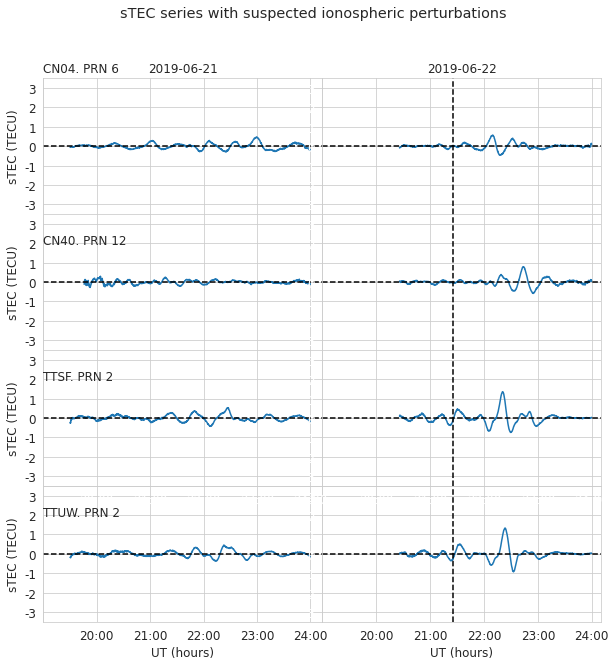

In [13]:
f1 = plt.figure()
ax7 = f1.add_subplot(4,2,7)
ax8 = f1.add_subplot(4,2,8)
ax1 = f1.add_subplot(4,2,1, sharex=ax7)
ax2 = f1.add_subplot(4,2,2, sharex=ax8)
ax3 = f1.add_subplot(4,2,3, sharex=ax7)
ax4 = f1.add_subplot(4,2,4, sharex=ax8)
ax5 = f1.add_subplot(4,2,5, sharex=ax7)
ax6 = f1.add_subplot(4,2,6, sharex=ax8)
#ax7 = f1.add_subplot(4,2,7, sharex=ax9)
#ax8 = f1.add_subplot(4,2,8, sharex=ax10)
#ax9.set_xlim(xlow, xhigh)
#ax10.set_xlim(xlow, xhigh)
ax1.set_ylim(ylow, yhigh)
ax2.set_ylim(ylow, yhigh)
ax3.set_ylim(ylow, yhigh)
ax4.set_ylim(ylow, yhigh)
ax5.set_ylim(ylow, yhigh)
ax6.set_ylim(ylow, yhigh)
ax7.set_ylim(ylow, yhigh)
ax8.set_ylim(ylow, yhigh)
#ax9.set_ylim(ylow, yhigh)
#ax10.set_ylim(ylow, yhigh)
ax1.plot(Pcn04_time, Pcn04_sTEC)
ax2.plot(cn04_time, cn04_sTEC)
ax3.plot(Pcn40_time, Pcn40_sTEC)
ax4.plot(cn40_time, cn40_sTEC)
ax5.plot(PTTSF_time, PTTSF_sTEC)
ax6.plot(TTSF_time, TTSF_sTEC)
ax7.plot(PTTUW_time, PTTUW_sTEC)
ax8.plot(TTUW_time, TTUW_sTEC)
#ax9.plot(PBOAV_time2, PBOAV_sTEC2)
#ax10.plot(BOAV_time2, BOAV_sTEC2)
ax1.axhline(0.0, c="k", ls="--")
ax2.axhline(0.0, c="k", ls="--")
ax3.axhline(0.0, c="k", ls="--")
ax4.axhline(0.0, c="k", ls="--")
ax5.axhline(0.0, c="k", ls="--")
ax6.axhline(0.0, c="k", ls="--")
ax7.axhline(0.0, c="k", ls="--")
ax8.axhline(0.0, c="k", ls="--")
#ax9.axhline(0.0, c="k", ls="--")
#ax10.axhline(0.0, c="k", ls="--")
ax2.axvline(starttime, c="k", ls="--")
ax4.axvline(starttime, c="k", ls="--")
ax6.axvline(starttime, c="k", ls="--")
ax8.axvline(starttime, c="k", ls="--")
#ax10.axvline(starttime, c="k", ls="--")
#ax4.set_title("PRN 12", loc="left", pad=-12, fontsize="large")
ax1.set_title("2019-06-21", fontsize="large")#, loc="right")
ax2.set_title("2019-06-22", fontsize="large")#, loc="right")
#ax3.set_title("2019-06-22", fontsize="large")#, loc="right")
ax1.set_ylabel("sTEC (TECU)", fontsize="large")
ax3.set_ylabel("sTEC (TECU)", fontsize="large")
ax5.set_ylabel("sTEC (TECU)", fontsize="large")
ax7.set_ylabel("sTEC (TECU)", fontsize="large")
#ax9.set_ylabel("sTEC (TECU)", fontsize="large")
ax7.set_xlabel("UT (hours)", fontsize="large")
ax8.set_xlabel("UT (hours)", fontsize="large")
ax7.set_xticks([19, 20, 21, 22, 23, 24])
ax8.set_xticks([19, 20, 21, 22, 23, 24])
ax1.set_xticklabels(["", "", "", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax2.set_xticklabels(["", "", "", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax3.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax4.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax5.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax6.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
#ax7.set_xticklabels(["", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
#ax8.set_xticklabels(["", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax7.set_xticklabels(["", "20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax8.set_xticklabels(["", "20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax1.set_title("CN04. PRN 6", loc="left", fontsize="large")
ax3.set_title("CN40. PRN 12", loc="left", fontsize="large", pad=-30)
ax5.set_title("TTSF. PRN 2", loc="left", fontsize="large", pad=-30)
ax7.set_title("TTUW. PRN 2", loc="left", fontsize="large", pad=-30)
#ax9.set_title("BOAV. PRN 2", loc="left", fontsize="large", pad=-30)
ax1.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax3.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax1.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax3.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax5.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax7.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax5.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax7.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
#ax9.set_yticks([-3, -2, -1, 0, 1, 2, 3])
#ax9.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax2.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax4.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax6.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax8.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax2.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax4.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax6.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax8.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
#ax10.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
f1.suptitle("sTEC series with suspected ionospheric perturbations", fontsize="x-large")
f1.subplots_adjust(wspace=0, hspace=0) 
f1.set_size_inches(10, 10)
f1.savefig("./paper/figures/sTEC-series-1-pretty.pdf")

/tmp/ipykernel_6169/1059829122.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", "", "", "22:00", "23:00", "24:00"], fontsize="large", color="w")
/tmp/ipykernel_6169/1059829122.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", "", "", "22:00", "23:00", "24:00"], fontsize="large", color="w")
/tmp/ipykernel_6169/1059829122.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
/tmp/ipykernel_6169/1059829122.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
/tmp/ipykernel_6169/1059829122.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(["", "", "21:00", "22:00", "23:00",

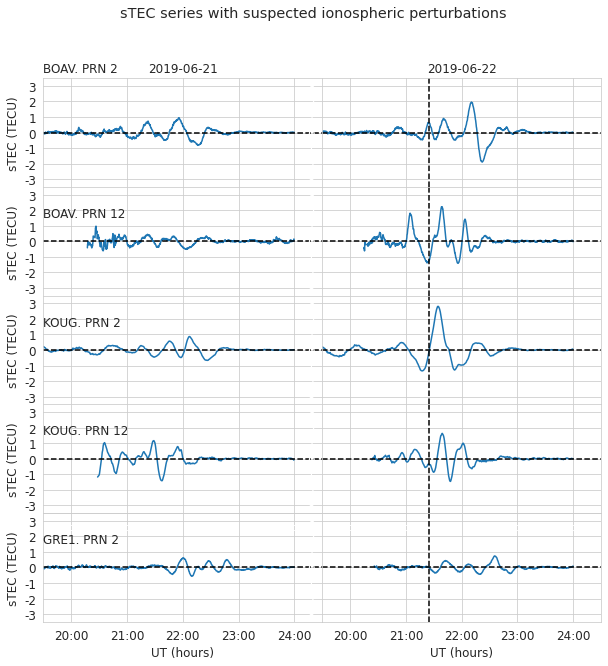

In [14]:
f2 = plt.figure()
ax9 = f2.add_subplot(5,2,9)
ax10 = f2.add_subplot(5,2,10)
ax1 = f2.add_subplot(5,2,1, sharex=ax9)
ax2 = f2.add_subplot(5,2,2, sharex=ax10)
ax3 = f2.add_subplot(5,2,3, sharex=ax9)
ax4 = f2.add_subplot(5,2,4, sharex=ax10)
ax5 = f2.add_subplot(5,2,5, sharex=ax9)
ax6 = f2.add_subplot(5,2,6, sharex=ax10)
ax7 = f2.add_subplot(5,2,7, sharex=ax9)
ax8 = f2.add_subplot(5,2,8, sharex=ax10)
ax9.set_xlim(xlow, xhigh)
ax10.set_xlim(xlow, xhigh)
ax1.set_ylim(ylow, yhigh)
ax2.set_ylim(ylow, yhigh)
ax3.set_ylim(ylow, yhigh)
ax4.set_ylim(ylow, yhigh)
ax5.set_ylim(ylow, yhigh)
ax6.set_ylim(ylow, yhigh)
ax7.set_ylim(ylow, yhigh)
ax8.set_ylim(ylow, yhigh)
ax9.set_ylim(ylow, yhigh)
ax10.set_ylim(ylow, yhigh)
ax1.plot(PBOAV_time2, PBOAV_sTEC2)
ax2.plot(BOAV_time2, BOAV_sTEC2)
ax3.plot(PBOAV_time12, PBOAV_sTEC12)
ax4.plot(BOAV_time12, BOAV_sTEC12)
ax5.plot(time2_p2, sTEC2_p2)
ax6.plot(time3_p2, sTEC3_p2)
ax7.plot(time2_p12, sTEC2_p12)
ax8.plot(time3_p12, sTEC3_p12)
ax9.plot(PGRE1_time, PGRE1_sTEC)
ax10.plot(GRE1_time, GRE1_sTEC)
ax1.axhline(0.0, c="k", ls="--")
ax2.axhline(0.0, c="k", ls="--")
ax3.axhline(0.0, c="k", ls="--")
ax4.axhline(0.0, c="k", ls="--")
ax5.axhline(0.0, c="k", ls="--")
ax6.axhline(0.0, c="k", ls="--")
ax7.axhline(0.0, c="k", ls="--")
ax8.axhline(0.0, c="k", ls="--")
ax9.axhline(0.0, c="k", ls="--")
ax10.axhline(0.0, c="k", ls="--")
ax2.axvline(starttime, c="k", ls="--")
ax4.axvline(starttime, c="k", ls="--")
ax6.axvline(starttime, c="k", ls="--")
ax8.axvline(starttime, c="k", ls="--")
ax10.axvline(starttime, c="k", ls="--")
#ax4.set_title("PRN 12", loc="left", pad=-12, fontsize="large")
ax1.set_title("2019-06-21", fontsize="large")#, loc="right")
ax2.set_title("2019-06-22", fontsize="large")#, loc="right")
#ax3.set_title("2019-06-22", fontsize="large")#, loc="right")
ax1.set_ylabel("sTEC (TECU)", fontsize="large")
ax3.set_ylabel("sTEC (TECU)", fontsize="large")
ax5.set_ylabel("sTEC (TECU)", fontsize="large")
ax7.set_ylabel("sTEC (TECU)", fontsize="large")
ax9.set_ylabel("sTEC (TECU)", fontsize="large")
ax9.set_xlabel("UT (hours)", fontsize="large")
ax10.set_xlabel("UT (hours)", fontsize="large")
#ax7.set_xticks([19, 20, 21, 22, 23, 24])
#ax8.set_xticks([19, 20, 21, 22, 23, 24])
ax1.set_xticklabels(["", "", "", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax2.set_xticklabels(["", "", "", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax3.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax4.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax5.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax6.set_xticklabels(["", "", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax7.set_xticklabels(["", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax8.set_xticklabels(["", "21:00", "22:00", "23:00", "24:00"], fontsize="large", color="w")
ax9.set_xticklabels(["", "20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax10.set_xticklabels(["", "20:00", "21:00", "22:00", "23:00", "24:00"], fontsize="large")
ax1.set_title("BOAV. PRN 2", loc="left", fontsize="large")
ax3.set_title("BOAV. PRN 12", loc="left", fontsize="large", pad=-30)
ax5.set_title("KOUG. PRN 2", loc="left", fontsize="large", pad=-30)
ax7.set_title("KOUG. PRN 12", loc="left", fontsize="large", pad=-30)
ax9.set_title("GRE1. PRN 2", loc="left", fontsize="large", pad=-30)
ax1.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax3.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax1.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax3.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax5.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax7.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax5.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax7.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax9.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax9.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large")
ax2.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax4.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax6.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax8.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax10.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax2.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax4.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax6.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax8.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
ax10.set_yticklabels([-3, -2, -1, 0, 1, 2, 3], fontsize="large", color="w")
f2.suptitle("sTEC series with suspected ionospheric perturbations", fontsize="x-large")
f2.subplots_adjust(wspace=0, hspace=0) 
f2.set_size_inches(10, 10)
f2.savefig("./paper/figures/sTEC-series-2-pretty.pdf")